Optimal solution: x1 = 13.6252, x2 = 5.3252
Optimal objective function value: 40.4499


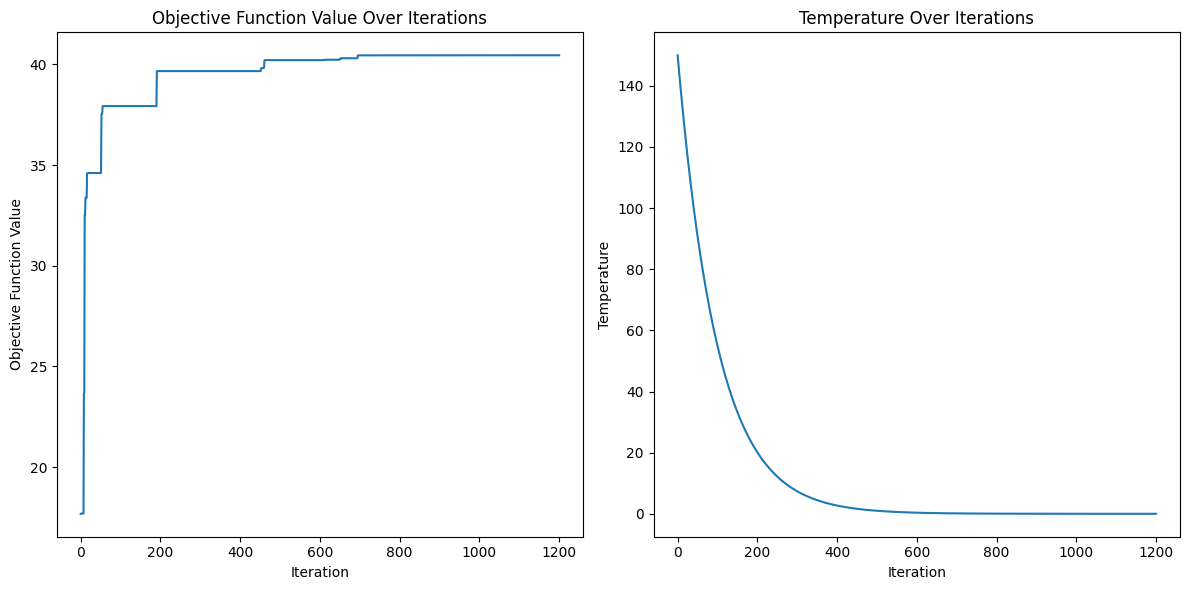

In [14]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def encode(x, lower, upper, bits):
    scale = (x - lower) / (upper - lower)
    integer = int(scale * (2**bits - 1))
    binary = bin(integer)[2:].zfill(bits)
    return np.array([int(b) for b in binary], dtype=int)

def decode(binary, lower, upper, bits):
    decimal = int("".join(str(b) for b in binary), 2)
    return lower + decimal / (2**bits - 1) * (upper - lower)

def objective_function(x1, x2):
    return 21.5 + x1 * math.sin(4 * math.pi * x1) + x2 * math.sin(20 * math.pi * x2)

def get_neighbor(solution, bits):
    new_solution = solution.copy()
    bit_to_flip = random.randint(0, len(solution) - 1)
    new_solution[bit_to_flip] = 1 - new_solution[bit_to_flip]
    return new_solution

def simulated_annealing(init_sol, temp, cool_rate, stop_temp, bounds, bits, internal_loops):
    current_solution = init_sol
    current_x1 = decode(current_solution[:bits], bounds[0][0], bounds[0][1], bits)
    current_x2 = decode(current_solution[bits:], bounds[1][0], bounds[1][1], bits)
    current_value = objective_function(current_x1, current_x2)
    best_solution = current_solution
    best_value = current_value
    values = [current_value]
    temperatures = [temp]

    while temp > stop_temp:
        for _ in range(internal_loops):
            neighbor = get_neighbor(current_solution, 2 * bits)
            neighbor_x1 = decode(neighbor[:bits], bounds[0][0], bounds[0][1], bits)
            neighbor_x2 = decode(neighbor[bits:], bounds[1][0], bounds[1][1], bits)
            neighbor_value = objective_function(neighbor_x1, neighbor_x2)
            if neighbor_value > current_value or random.random() < math.exp((neighbor_value - current_value) / temp):
                current_solution = neighbor
                current_x1, current_x2 = neighbor_x1, neighbor_x2
                current_value = neighbor_value
                if neighbor_value > best_value:
                    best_solution = neighbor
                    best_value = neighbor_value
            temp *= cool_rate
            values.append(best_value)
            temperatures.append(temp)

    best_x1 = decode(best_solution[:bits], bounds[0][0], bounds[0][1], bits)
    best_x2 = decode(best_solution[bits:], bounds[1][0], bounds[1][1], bits)
    return best_x1, best_x2, best_value, values, temperatures

bits = 16
lower_bounds = [-3, 4.1]
upper_bounds = [20, 5.8]
x1_initial = random.uniform(lower_bounds[0], upper_bounds[0])
x2_initial = random.uniform(lower_bounds[1], upper_bounds[1])
initial_solution = np.concatenate([encode(x1_initial, lower_bounds[0], upper_bounds[0], bits), encode(x2_initial, lower_bounds[1], upper_bounds[1], bits)])
initial_temp = 150
cooling_rate = 0.99
stop_temp = 0.001
internal_loops = 200

bounds = [(lower_bounds[0], upper_bounds[0]), (lower_bounds[1], upper_bounds[1])]
best_x1, best_x2, best_value, values, temperatures = simulated_annealing(initial_solution, initial_temp, cooling_rate, stop_temp, bounds, bits, internal_loops)

print(f"Optimal solution: x1 = {best_x1:.4f}, x2 = {best_x2:.4f}")
print(f"Optimal objective function value: {best_value:.4f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(values)
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value Over Iterations')

plt.subplot(1, 2, 2)
plt.plot(temperatures)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature Over Iterations')
plt.tight_layout()
plt.show()      

최적 해: x1 = -2.1276403779319653, x2 = 5.2219473825203675
최적 값: 28.75265866785864


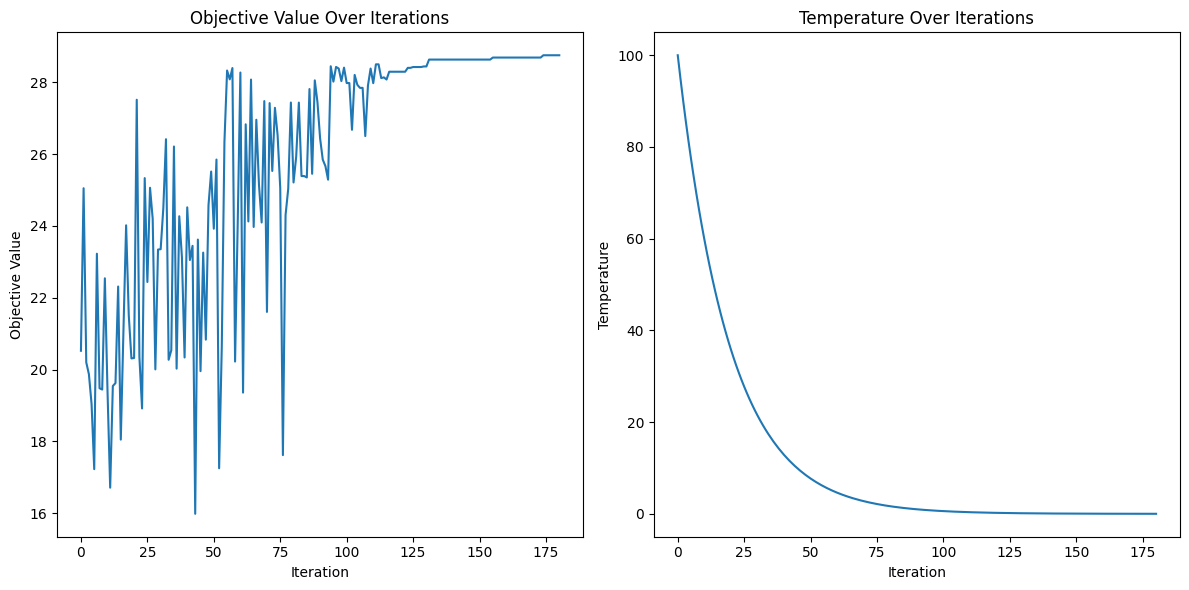

In [15]:
import random
import math
import matplotlib.pyplot as plt

# 목표 함수
def objective_function(x1, x2):
    return 21.5 + x1 * math.sin(4 * math.pi * x1) + x2 * math.sin(20 * math.pi * x2)

# 이웃 해 생성 함수
def neighbor_function(x1, x2, x1_range, x2_range):
    neighbor_x1 = x1 + random.uniform(-0.1, 0.1)  # 작은 변화량으로 이웃 해 생성
    neighbor_x2 = x2 + random.uniform(-0.1, 0.1)

    # 범위를 벗어나지 않도록 조정
    neighbor_x1 = min(max(neighbor_x1, x1_range[0]), x1_range[1])
    neighbor_x2 = min(max(neighbor_x2, x2_range[0]), x2_range[1])

    return neighbor_x1, neighbor_x2

# 시뮬레이티드 어닐링 알고리즘
def simulated_annealing(initial_x1, initial_x2, initial_temp, cooling_rate, stop_temp, x1_range, x2_range, internal_loops=10):
    current_x1, current_x2 = initial_x1, initial_x2
    current_value = objective_function(current_x1, current_x2)
    best_x1, best_x2 = current_x1, current_x2
    best_value = current_value
    temp = initial_temp

    values = [current_value]
    temps = [temp]

    while temp > stop_temp:
        for _ in range(internal_loops):
            neighbor_x1, neighbor_x2 = neighbor_function(current_x1, current_x2, x1_range, x2_range)
            neighbor_value = objective_function(neighbor_x1, neighbor_x2)

            if neighbor_value > current_value or random.random() < math.exp((neighbor_value - current_value) / temp):
                current_x1, current_x2 = neighbor_x1, neighbor_x2
                current_value = neighbor_value

                if neighbor_value > best_value:
                    best_x1, best_x2 = neighbor_x1, neighbor_x2
                    best_value = neighbor_value

        temp *= cooling_rate
        values.append(current_value)
        temps.append(temp)

    return best_x1, best_x2, best_value, values, temps

# 초기 해 설정
x1_range = (-3, 20)
x2_range = (4.1, 5.8)
x1_initial = random.uniform(x1_range[0], x1_range[1])
x2_initial = random.uniform(x2_range[0], x2_range[1])
initial_temp = 100.0
cooling_rate = 0.95
stop_temp = 0.01


# 시뮬레이티드 어닐링 실행
best_x1, best_x2, best_value, values, temps = simulated_annealing(x1_initial, x2_initial, initial_temp, cooling_rate, stop_temp, x1_range, x2_range)

# 결과 출력
print(f"최적 해: x1 = {best_x1}, x2 = {best_x2}")
print(f"최적 값: {best_value}")

# 그래프 그리기
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Objective Value Over Iterations')

plt.subplot(1, 2, 2)
plt.plot(temps)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature Over Iterations')

plt.tight_layout()
plt.show()